In [1]:
import numpy as np
import struct

width = 240
height = 180

xc = 92

def load_img(name):
    with open(rf"{name}.dump", mode='rb') as file: # b is important -> binary
        fileContent = file.read()
    img = np.zeros((width, height))
    x = 0
    y = 0
    for v in struct.iter_unpack("H", fileContent):
        img[x,y] = v[0]
        x += 1
        if x == width:
            x = 0
            y += 1
    return img

def zeroToNone(v):
    return v if v > 0 else None

def draw_yline(ax, img, x, label=""):
    y = range(height)
    x1 = [zeroToNone(img[x,height-i-1]) for i in y]
    ax.scatter(y, x1, label=f"{label}{x}")

def draw_xline(ax, img, y, label=""):
    x = range(width)
    y1 = [zeroToNone(img[i,height-y-1]) for i in x]
    ax.scatter(x, y1, label=f"{label}{y}")

import numpy as np
from PIL import Image

def getImage(img):
    array = np.zeros((img.shape[1],img.shape[0]))
    vmin = 10000000
    vmax = 0
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            v = img[x,y]
            if v < vmin:
                vmin = v
            if v > vmax:
                vmax = v
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            v = int((img[x,y] - vmin) * 255 / (vmax - vmin))
            array[y,x] = v
    return Image.fromarray(array)


[ 1.49681642e-02 -1.87865657e-01  1.77340481e+02]


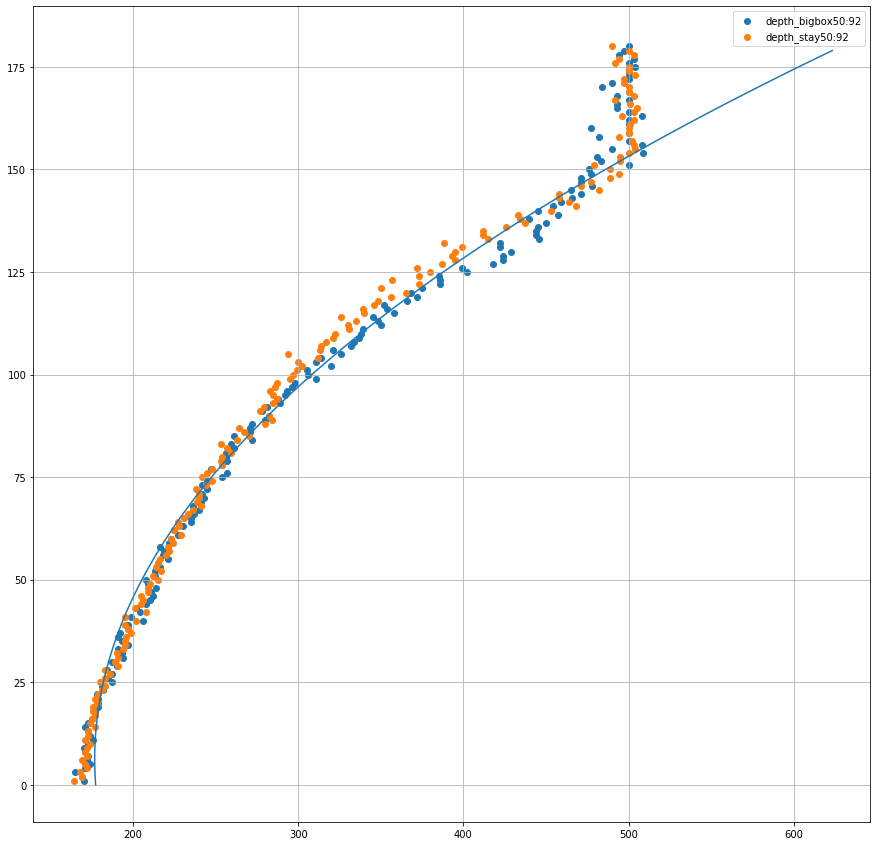

In [38]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def dscatter(file, x0, pa, pv):
    img = load_img(file)
    xd = []
    yd = []
    for y in range(height):
        d = img[x0,y]
        xd.append(d)
        yd.append(height - y)
        if height - y < 150:
            pa.append(height - y)
            pv.append(d)

    ax.scatter(xd, yd, label=f"{file}:{x0}")

pa = []
pv = []
    
dscatter("depth_bigbox50", xc, pa, pv)
dscatter("depth_stay50", xc, pa, pv)

c = np.polyfit(pa, pv, 2)
print(c)
xp = []
yp = []
for y in range(height):
    yp.append(y)
    v = 0
    for k in c:
        v = v * y + k
    xp.append(v)
ax.plot(xp,yp)

    
ax.grid(True)
ax.legend()
#ax.set_ylim(-50,200)
#ax.set_xlim(0,80)
    
plt.show()

[ 5.89494380e-06 -7.03269136e-03  3.00940632e+00 -3.28471368e+02]


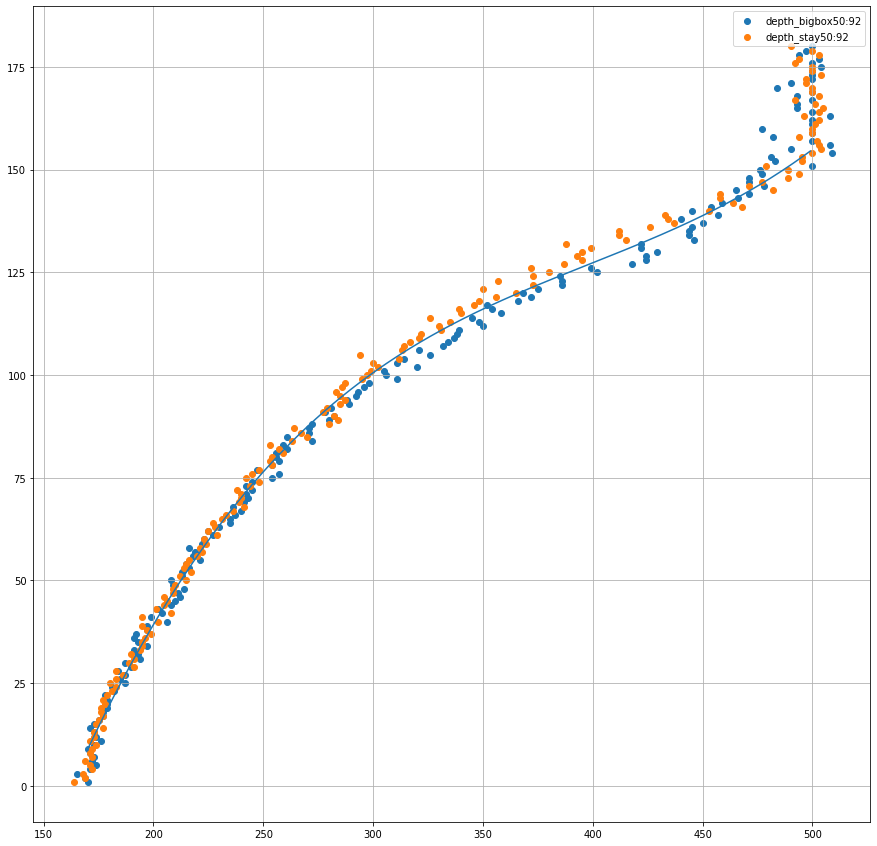

In [55]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def dscatter(file, x0, pa, pv):
    img = load_img(file)
    xd = []
    yd = []
    for y in range(height):
        d = img[x0,y]
        xd.append(d)
        yd.append(height - y)
        if height - y < 150:
            pa.append(d)
            pv.append(height - y)

    ax.scatter(xd, yd, label=f"{file}:{x0}")

pa = []
pv = []
    
dscatter("depth_bigbox50", xc, pa, pv)
dscatter("depth_stay50", xc, pa, pv)

c = np.polyfit(pa, pv, 3)
print(c)
xp = []
yp = []
for x in range(170, 500):
    xp.append(x)
    v = 0
    for k in c:
        v = v * x + k
    yp.append(v)
ax.plot(xp,yp)

    
ax.grid(True)
ax.legend()
#ax.set_ylim(-50,200)
#ax.set_xlim(0,80)
    
plt.show()

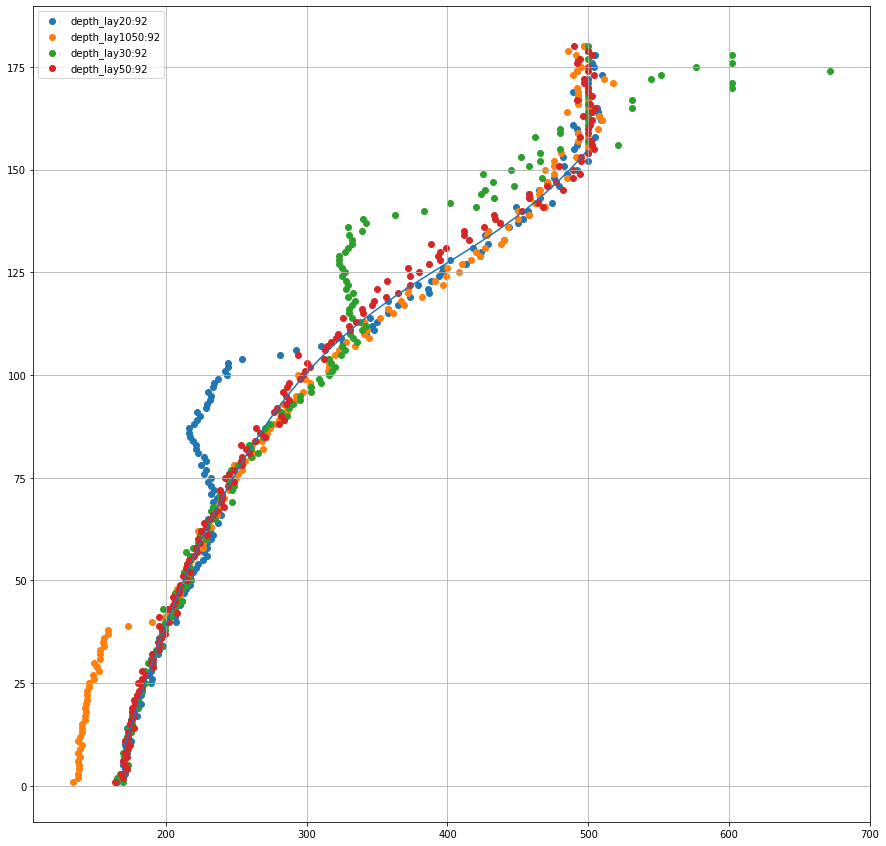

In [59]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()


def fdistance(y):
    c = [1.49681642e-02, -1.87865657e-01,  1.77340481e+02]
    v = 0
    for k in c:
        v = v * y + k
    return v

def fy(d):
    c = [ 5.89494380e-06, -7.03269136e-03,  3.00940632e+00, -3.28471368e+02]
    v = 0
    for k in c:
        v = v * d + k
    return v
    
def drawGround(ax):
    
    xp = []
    yp = []
    for y in range(height):
        yp.append(y)
        xp.append(fdistance(y))
    ax.plot(xp,yp)

def drawGround2(ax):
    xp = []
    yp = []
    for d in range(170, 500):
        xp.append(d)
        yp.append(fy(d))

    ax.plot(xp,yp)

def dscatter(file, x0):
    img = load_img(file)
    xd = []
    yd = []
    for y in range(height):
        d = img[x0,y]
        xd.append(d)
        yd.append(height - y)

    ax.scatter(xd, yd, label=f"{file}:{x0}")

#dscatter("depth_bigbox30", xc)
dscatter("depth_lay20", xc)
dscatter("depth_lay1050", xc)
dscatter("depth_lay30", xc)
dscatter("depth_lay50", xc)
#drawGround(ax)
drawGround2(ax)

ax.grid(True)
ax.legend()
#ax.set_ylim(-50,200)
#ax.set_xlim(0,80)
    
plt.show()

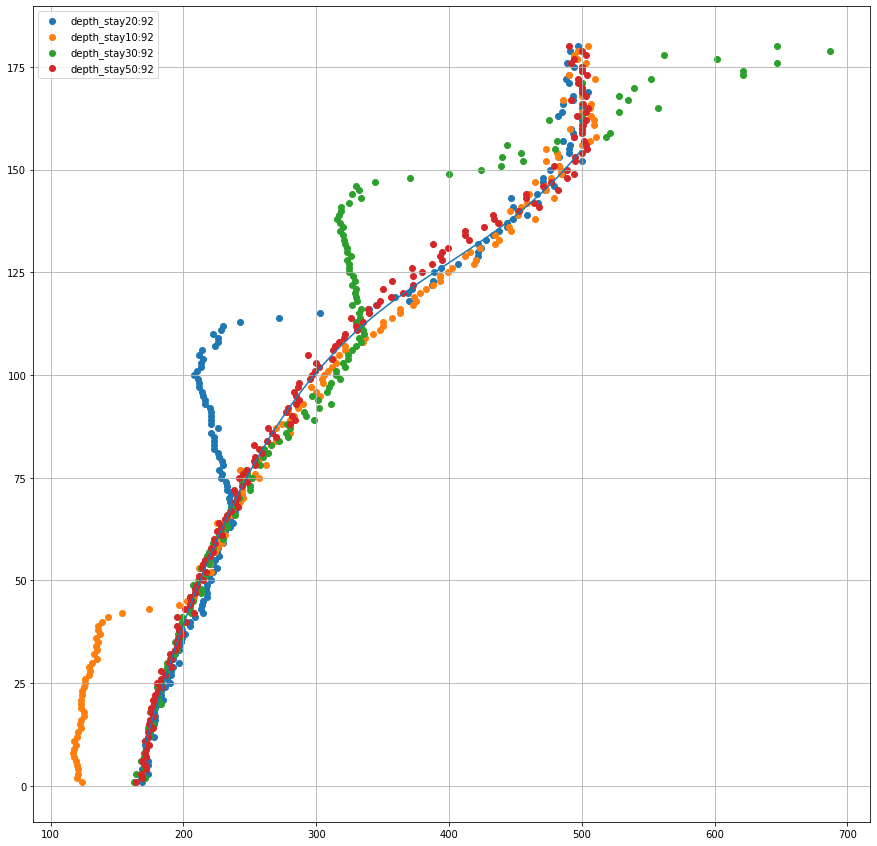

In [60]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def dscatter(file, x0):
    img = load_img(file)
    xd = []
    yd = []
    for y in range(height):
        d = img[x0,y]
        xd.append(d)
        yd.append(height - y)

    ax.scatter(xd, yd, label=f"{file}:{x0}")

#dscatter("depth_bigbox30", xc)
dscatter("depth_stay20", xc)
dscatter("depth_stay10", xc)
dscatter("depth_stay30", xc)
dscatter("depth_stay50", xc)
drawGround2(ax)

ax.grid(True)
ax.legend()
#ax.set_ylim(-50,200)
#ax.set_xlim(0,80)
    
plt.show()

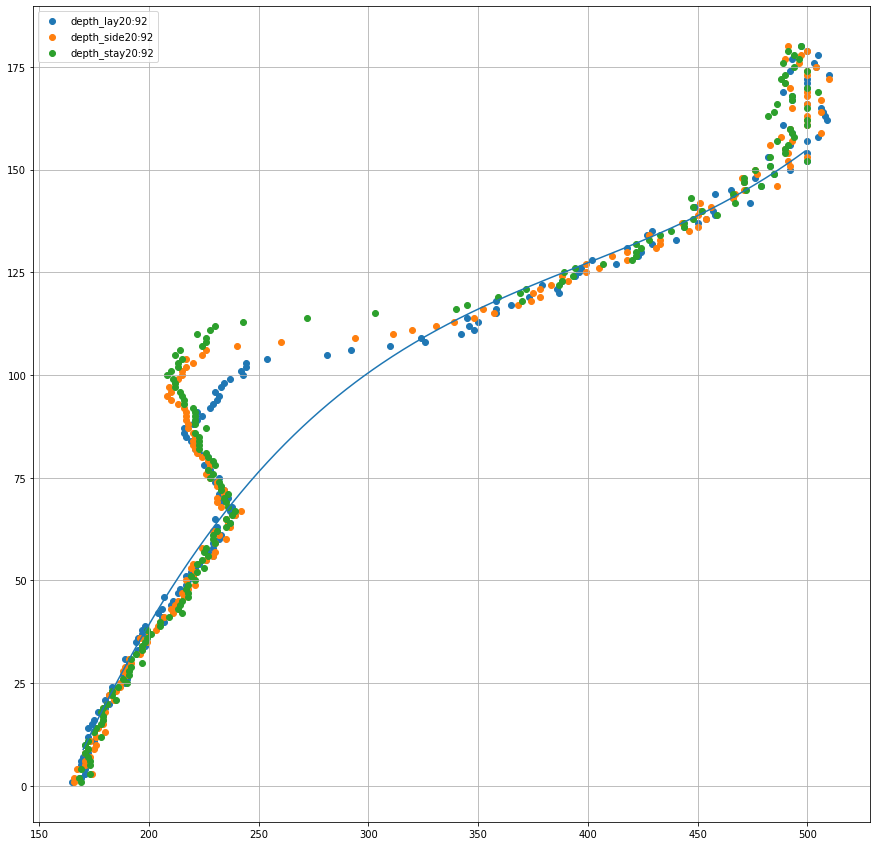

In [61]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def dscatter(file, x0):
    img = load_img(file)
    xd = []
    yd = []
    for y in range(height):
        d = img[x0,y]
        xd.append(d)
        yd.append(height - y)

    ax.scatter(xd, yd, label=f"{file}:{x0}")

dscatter("depth_lay20", xc)
dscatter("depth_side20", xc)
dscatter("depth_stay20", xc)
drawGround2(ax)

ax.grid(True)
ax.legend()
#ax.set_ylim(-50,200)
#ax.set_xlim(0,80)
    
plt.show()

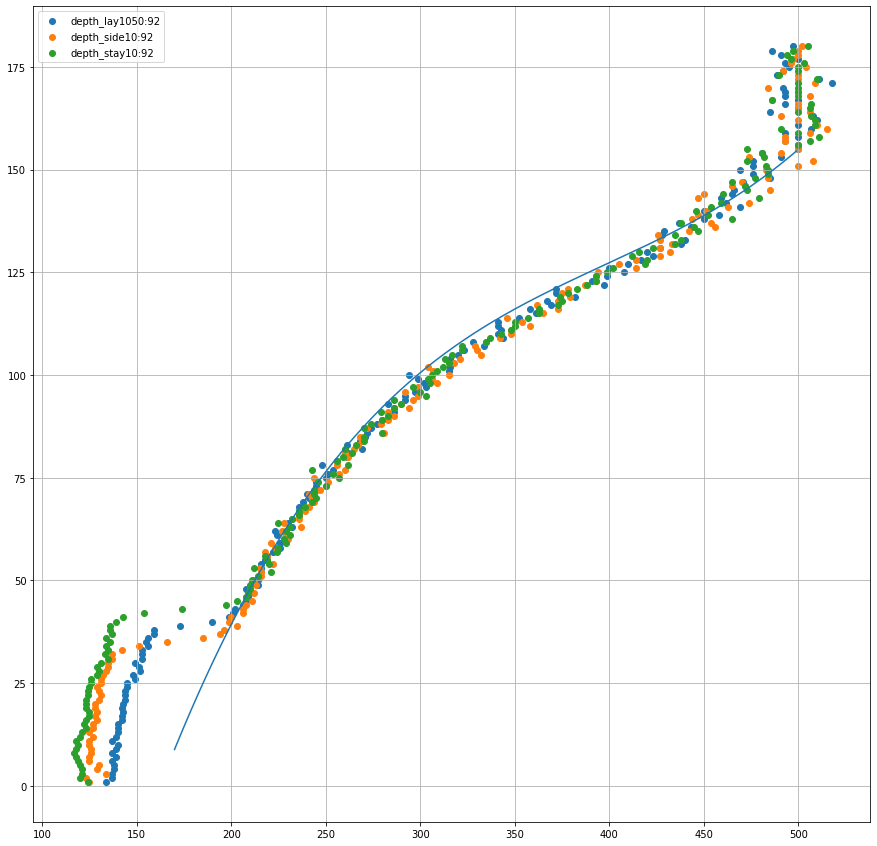

In [62]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def dscatter(file, x0):
    img = load_img(file)
    xd = []
    yd = []
    for y in range(height):
        d = img[x0,y]
        xd.append(d)
        yd.append(height - y)

    ax.scatter(xd, yd, label=f"{file}:{x0}")

dscatter("depth_lay1050", xc)
dscatter("depth_side10", xc)
dscatter("depth_stay10", xc)
drawGround2(ax)

ax.grid(True)
ax.legend()
#ax.set_ylim(-50,200)
#ax.set_xlim(0,80)
    
plt.show()

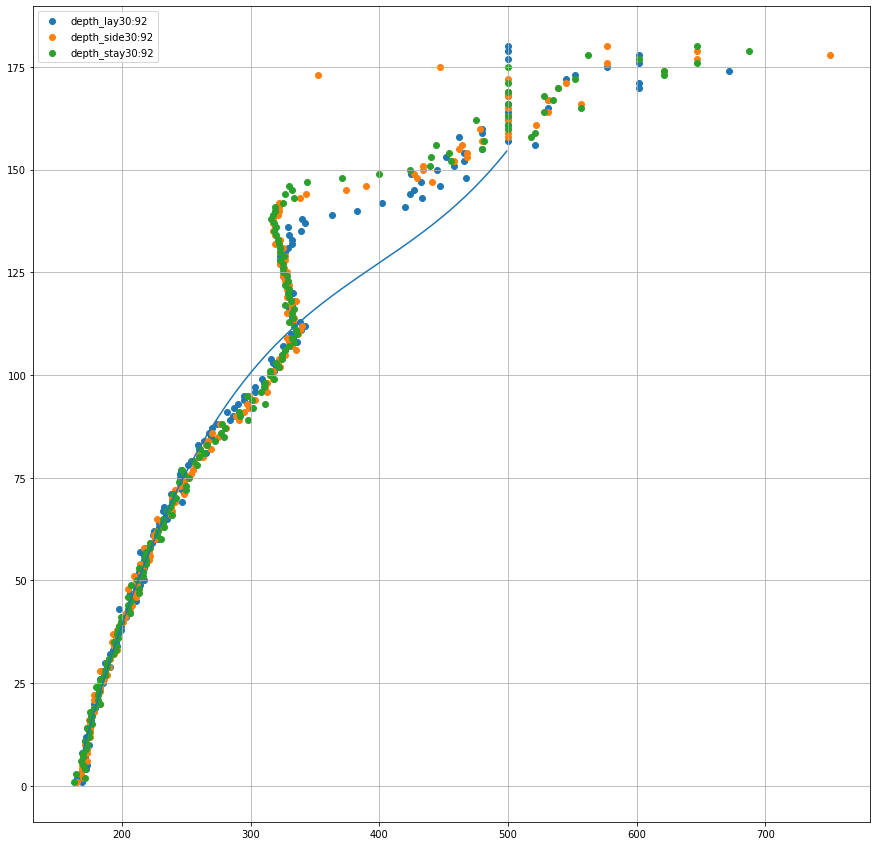

In [63]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def dscatter(file, x0):
    img = load_img(file)
    xd = []
    yd = []
    for y in range(height):
        d = img[x0,y]
        xd.append(d)
        yd.append(height - y)

    ax.scatter(xd, yd, label=f"{file}:{x0}")

dscatter("depth_lay30", xc)
dscatter("depth_side30", xc)
dscatter("depth_stay30", xc)
drawGround2(ax)

ax.grid(True)
ax.legend()
#ax.set_ylim(-50,200)
#ax.set_xlim(0,80)
    
plt.show()

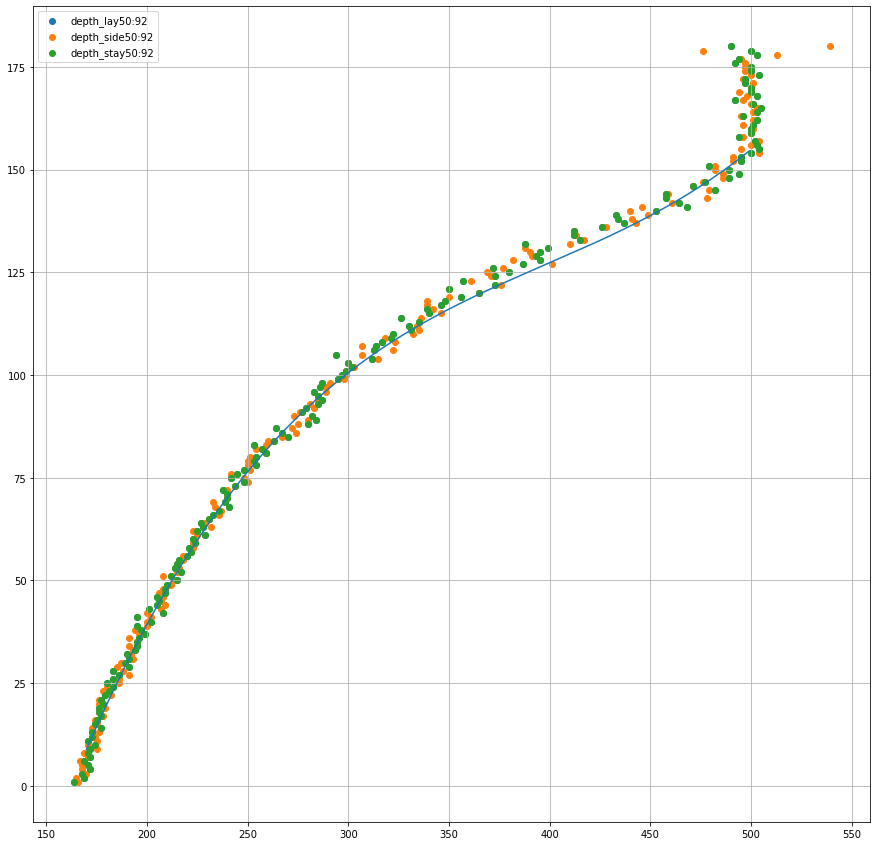

In [64]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def dscatter(file, x0):
    img = load_img(file)
    xd = []
    yd = []
    for y in range(height):
        d = img[x0,y]
        xd.append(d)
        yd.append(height - y)

    ax.scatter(xd, yd, label=f"{file}:{x0}")

dscatter("depth_lay50", xc)
dscatter("depth_side50", xc)
dscatter("depth_stay50", xc)
drawGround2(ax)

ax.grid(True)
ax.legend()
#ax.set_ylim(-50,200)
#ax.set_xlim(0,80)
    
plt.show()

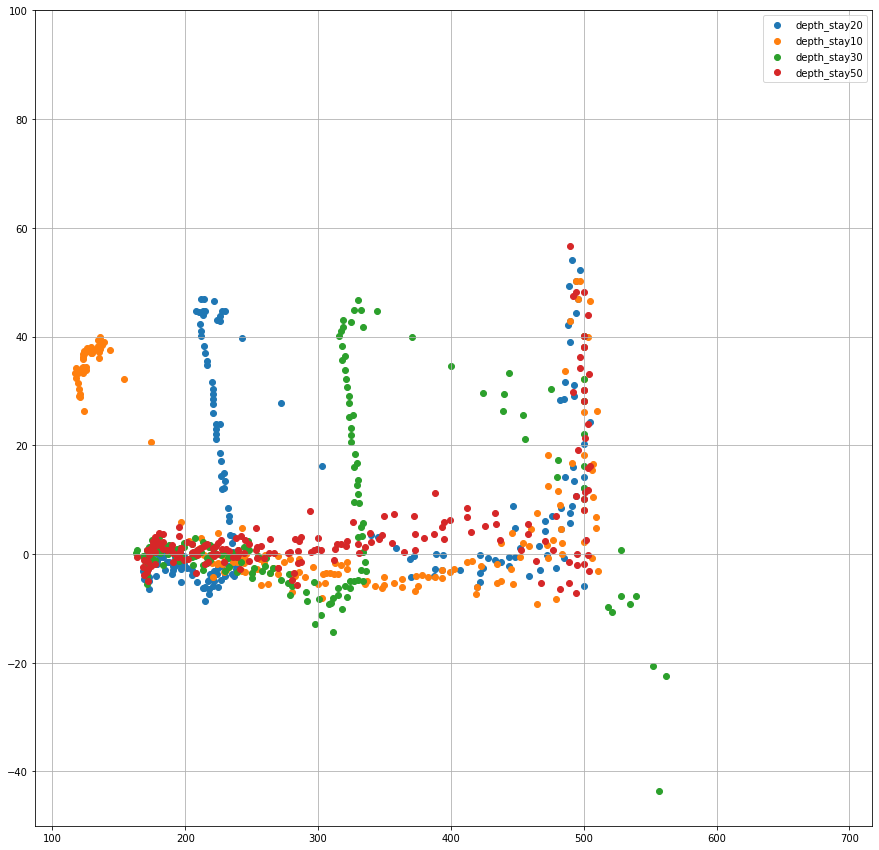

In [81]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def dscatter2(file, x0):
    img = load_img(file)
    xd = []
    yd3 = []
    for y in range(height):
        d = img[x0,y]
        xd.append(d)
        yd3.append((height - y - fy(d)) * (d / 250)  )

    ax.scatter(xd, yd3, label=f"{file}")

dscatter2("depth_stay20", xc)
dscatter2("depth_stay10", xc)
dscatter2("depth_stay30", xc)
dscatter2("depth_stay50", xc)

ax.grid(True)
ax.legend()
ax.set_ylim(-50,100)
#ax.set_xlim(0,80)
    
plt.show()

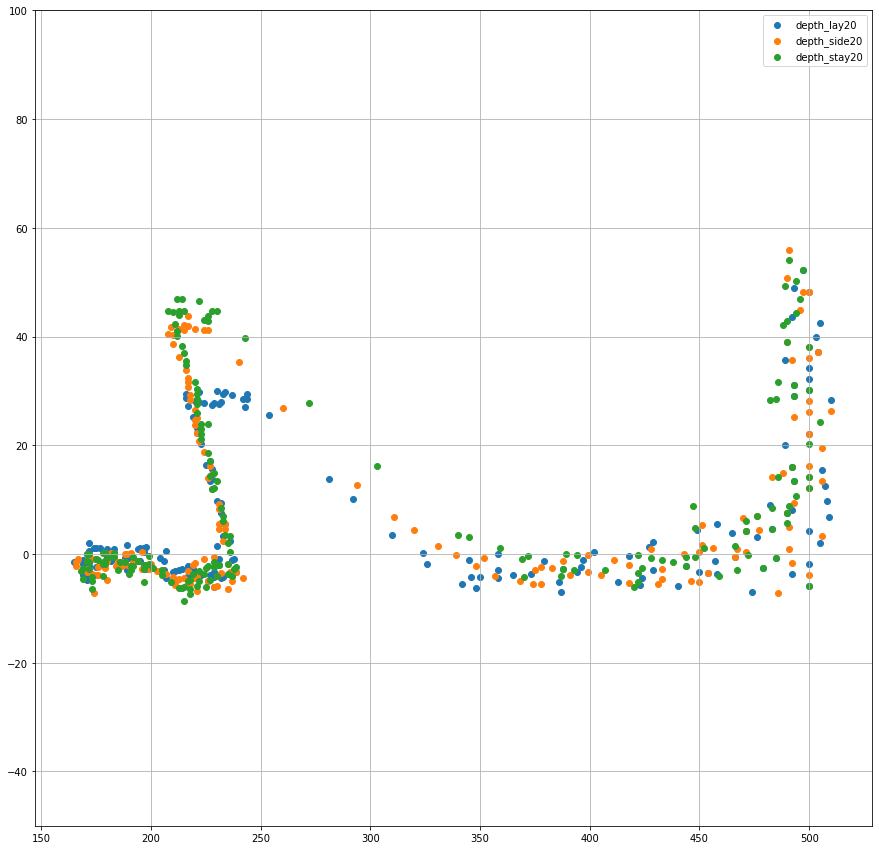

In [82]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

dscatter2("depth_lay20", xc)
dscatter2("depth_side20", xc)
dscatter2("depth_stay20", xc)

ax.grid(True)
ax.legend()
ax.set_ylim(-50,100)
#ax.set_xlim(0,80)
    
plt.show()

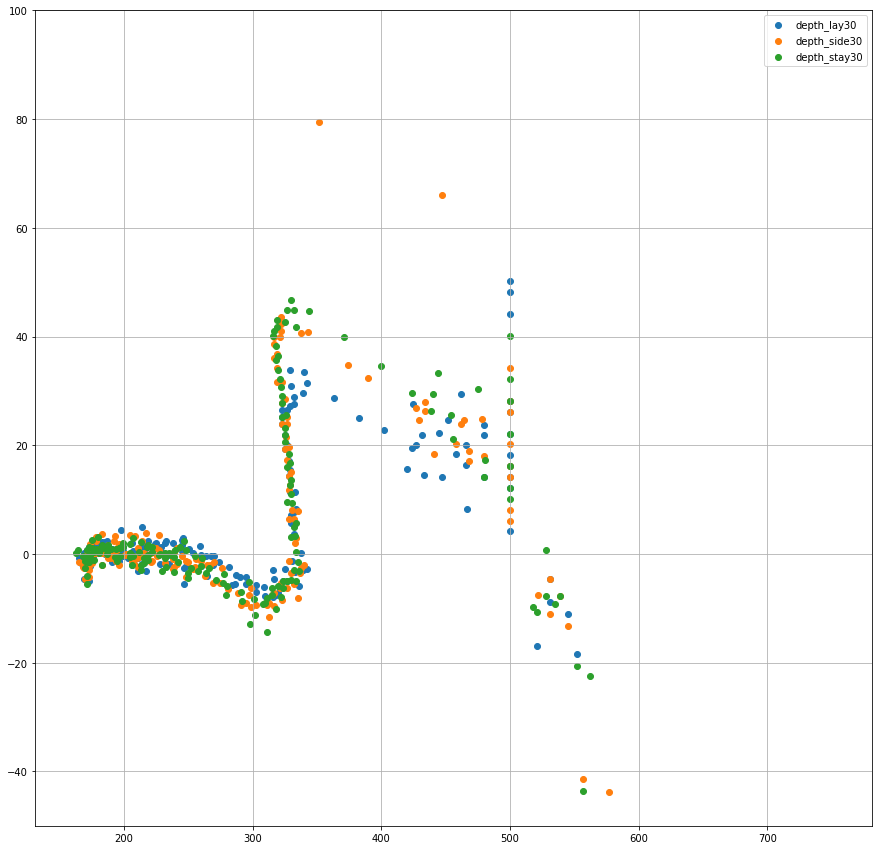

In [83]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

dscatter2("depth_lay30", xc)
dscatter2("depth_side30", xc)
dscatter2("depth_stay30", xc)

ax.grid(True)
ax.legend()
ax.set_ylim(-50,100)
#ax.set_xlim(0,80)
    
plt.show()

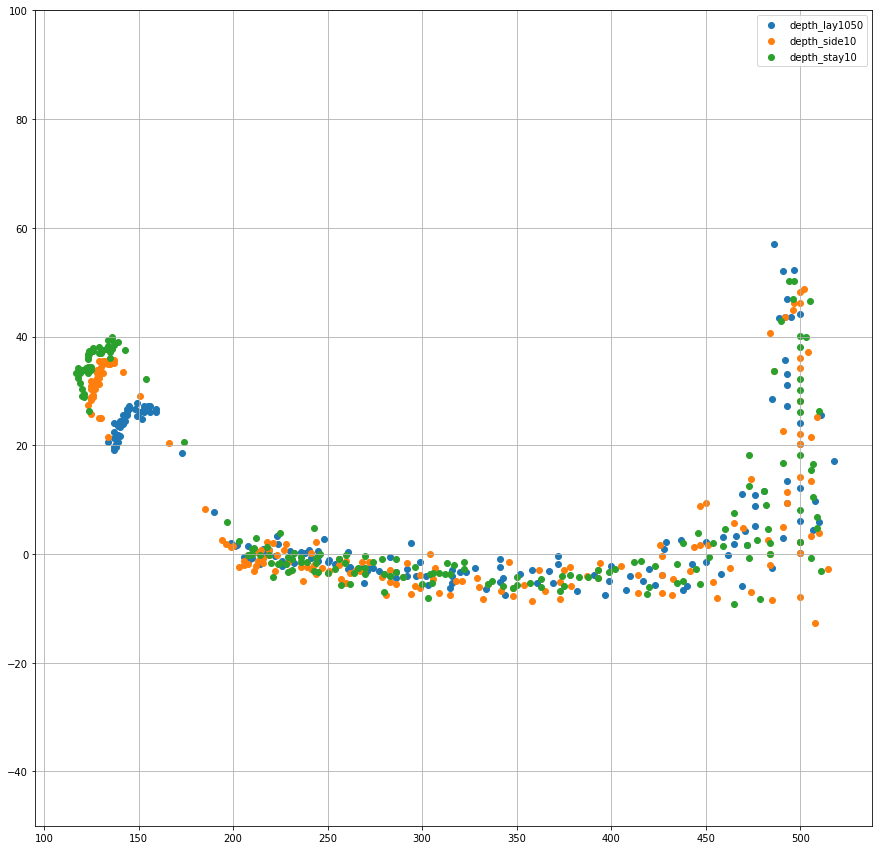

In [84]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

dscatter2("depth_lay1050", xc)
dscatter2("depth_side10", xc)
dscatter2("depth_stay10", xc)

ax.grid(True)
ax.legend()
ax.set_ylim(-50,100)
#ax.set_xlim(0,80)
    
plt.show()

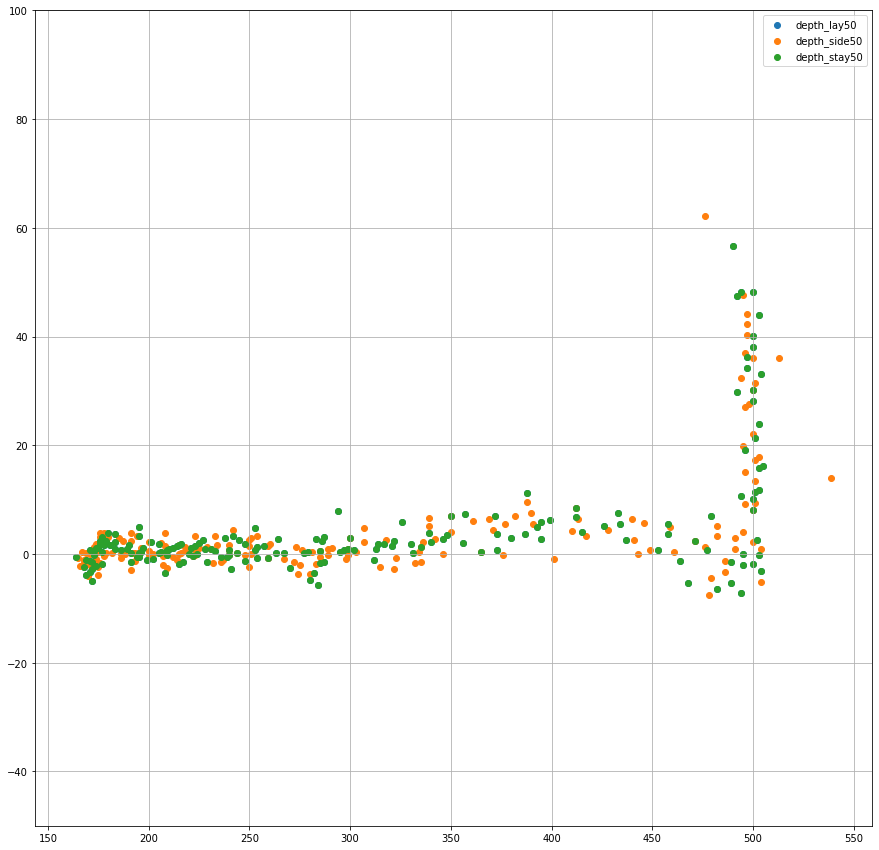

In [85]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()


dscatter2("depth_lay50", xc)
dscatter2("depth_side50", xc)
dscatter2("depth_stay50", xc)

ax.grid(True)
ax.legend()
ax.set_ylim(-50,100)
#ax.set_xlim(0,80)
    
plt.show()

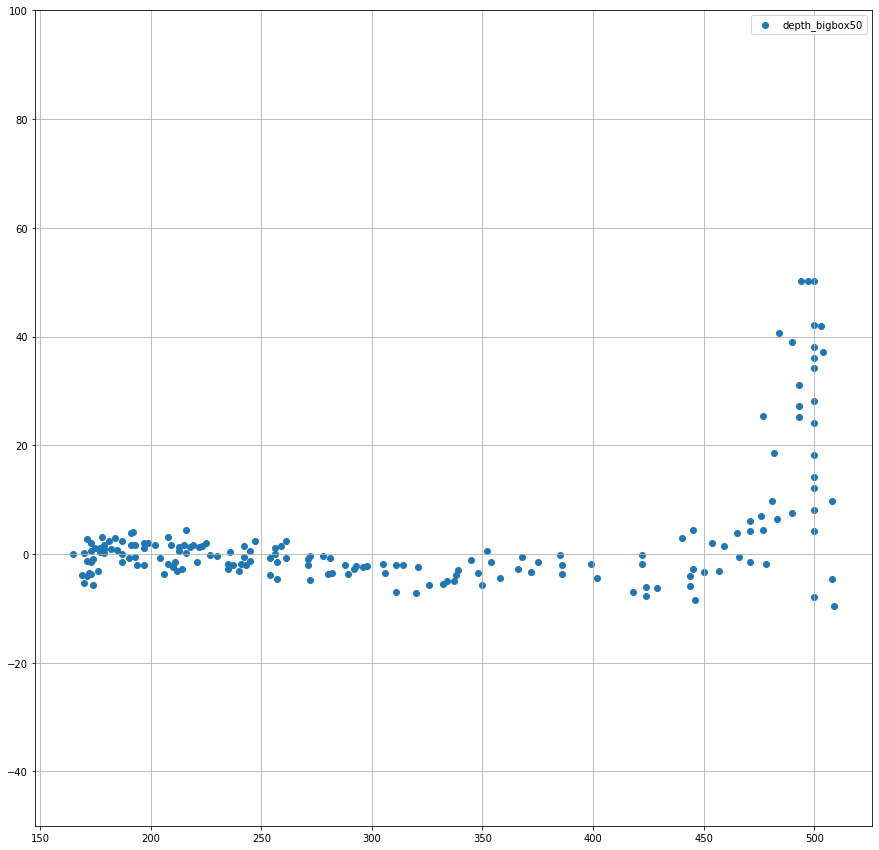

In [86]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()


dscatter2("depth_bigbox50", xc)

ax.grid(True)
ax.legend()
ax.set_ylim(-50,100)
#ax.set_xlim(0,80)
    
plt.show()

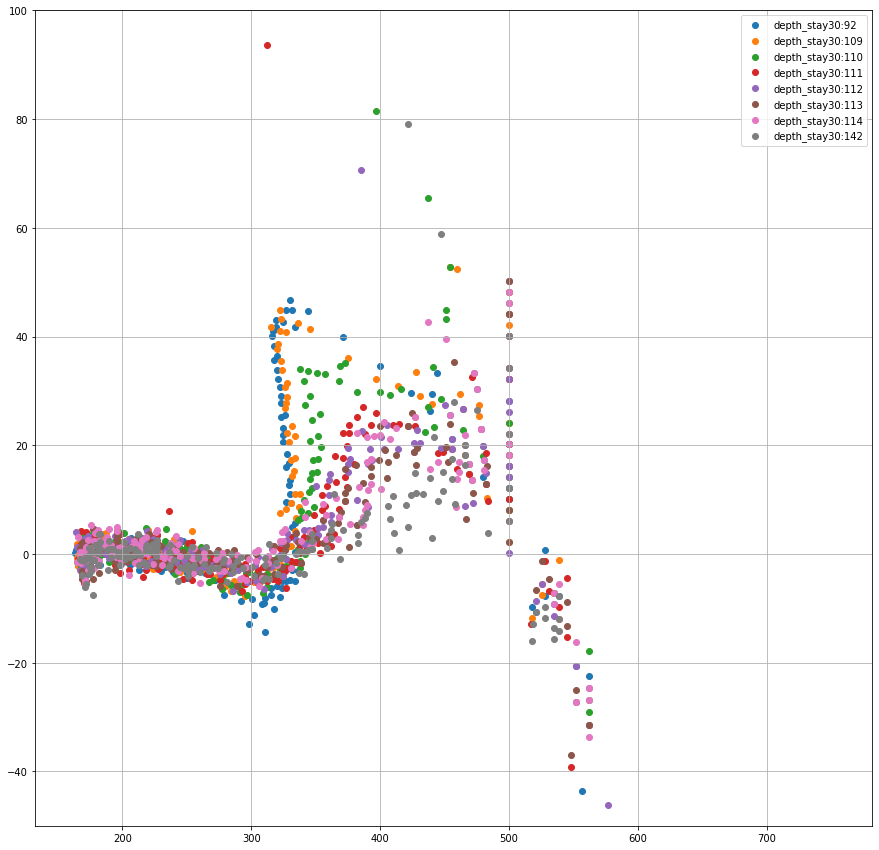

In [102]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def dscatter3(file, x0):
    img = load_img(file)
    xd = []
    yd3 = []
    for y in range(height):
        d = img[x0,y]
        xd.append(d)
        yd3.append((height - y - fy(d)) * (d / 250)  )

    ax.scatter(xd, yd3, label=f"{file}:{x0}")


dscatter3("depth_stay30", xc)
dscatter3("depth_stay30", xc + 17) # real last
dscatter3("depth_stay30", xc + 18)
dscatter3("depth_stay30", xc + 19)
dscatter3("depth_stay30", xc + 20)
dscatter3("depth_stay30", xc + 21)
dscatter3("depth_stay30", xc + 22)
dscatter3("depth_stay30", xc + 50)



ax.grid(True)
ax.legend()
ax.set_ylim(-50,100)
#ax.set_xlim(0,80)
    
plt.show()

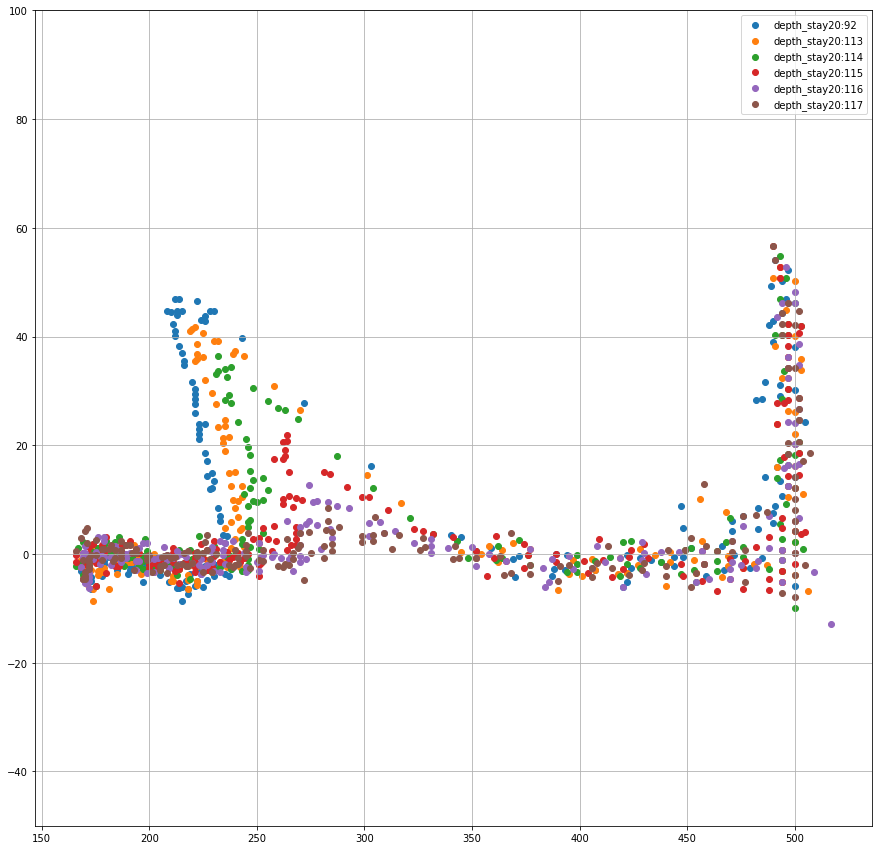

In [106]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def dscatter3(file, x0):
    img = load_img(file)
    xd = []
    yd3 = []
    for y in range(height):
        d = img[x0,y]
        xd.append(d)
        yd3.append((height - y - fy(d)) * (d / 250)  )

    ax.scatter(xd, yd3, label=f"{file}:{x0}")


dscatter3("depth_stay20", xc)
dscatter3("depth_stay20", xc + 21) # real last 113
dscatter3("depth_stay20", xc + 22)
dscatter3("depth_stay20", xc + 23)
dscatter3("depth_stay20", xc + 24)
dscatter3("depth_stay20", xc + 25)



ax.grid(True)
ax.legend()
ax.set_ylim(-50,100)
#ax.set_xlim(0,80)
    
plt.show()

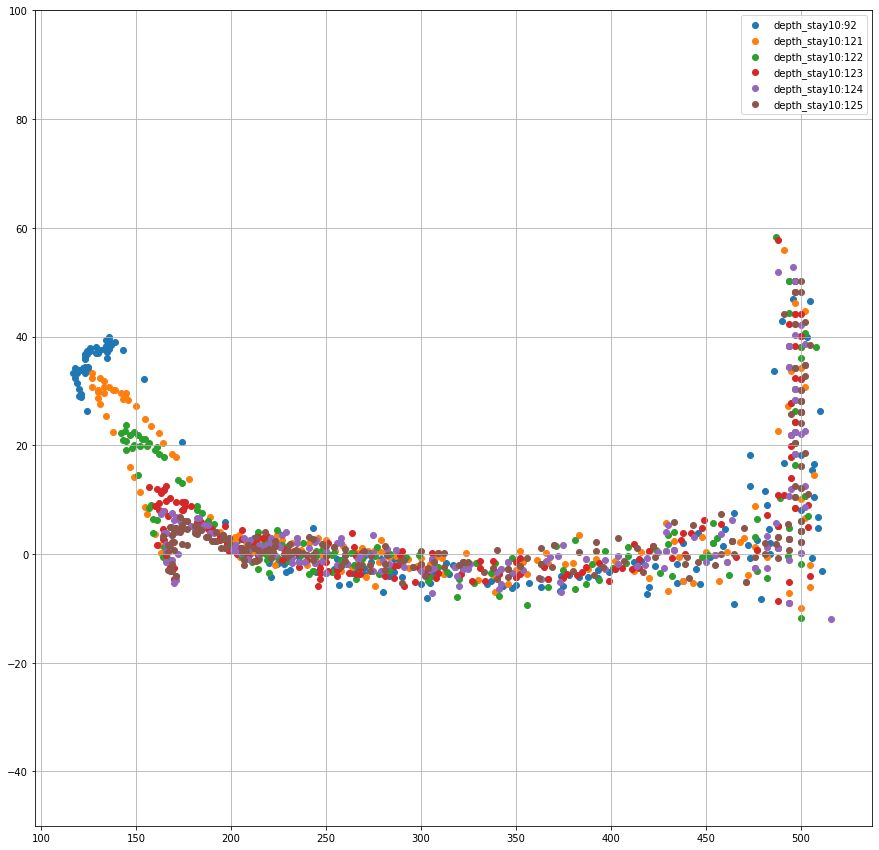

In [108]:
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def dscatter3(file, x0):
    img = load_img(file)
    xd = []
    yd3 = []
    for y in range(height):
        d = img[x0,y]
        xd.append(d)
        yd3.append((height - y - fy(d)) * (d / 250)  )

    ax.scatter(xd, yd3, label=f"{file}:{x0}")


dscatter3("depth_stay10", xc)
dscatter3("depth_stay10", xc + 29) # real last 121
dscatter3("depth_stay10", xc + 30)
dscatter3("depth_stay10", xc + 31)
dscatter3("depth_stay10", xc + 32)
dscatter3("depth_stay10", xc + 33)



ax.grid(True)
ax.legend()
ax.set_ylim(-50,100)
#ax.set_xlim(0,80)
    
plt.show()

[(295.0, 95.73877581555975, 43.0, 56)]


y,d,h0,state
179,171,-6.13558,ground
178,174,-7.8636,ground
177,171,-4.76758,***
176,172,-4.8762,ground
175,175,-6.57425,ground
174,172,-3.5002,***
173,171,-2.03158,ground
172,173,-2.90422,ground
171,175,-3.77425,ground
170,176,-3.8561,ground


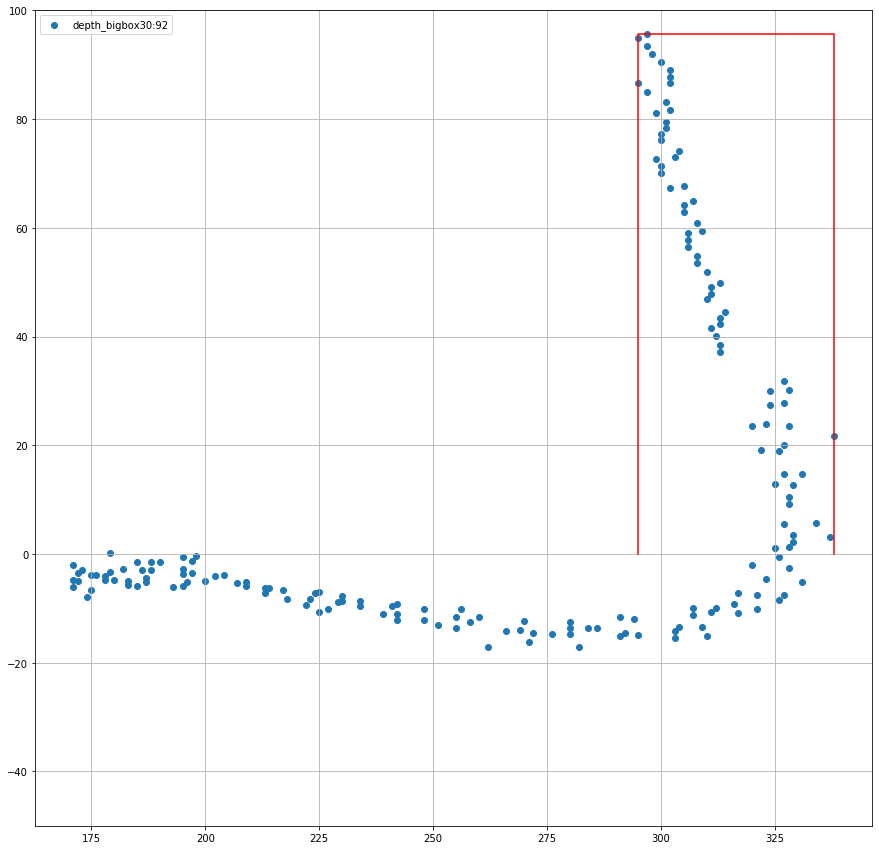

In [63]:
from scipy.ndimage import convolve
from math import *
from tabulate import tabulate
from IPython.display import HTML, display

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def fdistance(y):
    c = [1.49681642e-02, -1.87865657e-01,  1.77340481e+02]
    v = 0
    for k in c:
        v = v * y + k
    return v

def fy(d):
    c = [ 5.89494380e-06, -7.03269136e-03,  3.00940632e+00, -3.28471368e+02]
    v = 0
    for k in c:
        v = v * d + k
    return v

def fh(y,d):
    return (height - y - fy(d)) * (d / 250) 

def dscatter3(file, x0):
    img = load_img(file)
    xd = []
    yd3 = []

    table = [["y", "d", "h0", "state", "objs"]]
    
    objs = []
    thlast = None
    tylast = None
    tdlast = None
    state = "unknown"
    for y in range(height):
        d0 = img[x0,height - y - 1]
        xd.append(d0)
        h0 = fh(height - y - 1,d0)
        yd3.append(h0)
        
        if thlast is None or abs(h0 - thlast) / (y - tylast) < 3:
            if state == "ground":
                if h0 > 10:
                    state = "obj"
                    cfoh = h0
                    cfod = d0
                    cfof = d0
                    ccnt = 0
            else:
                if state == "obj":
                    if h0 <= 10:
                        objs.append((cfod, cfoh, cfof - cfod,ccnt))
                        state = "ground"
                    else:
                        if abs(d0 - tdlast) >= 20:
                            objs.append((cfod,cfoh, cfof - cfod, ccnt))
                            state = "unknown"
                        else:
                            ccnt += 1
                            if h0 > cfoh:
                                cfoh = h0
                            if d0 < cfod:
                                cfod = d0
                            if d0 > cfof:
                                cfof = d0
                else:
                    if state == "unknown":
                        if h0 < 10:
                            state = "ground"
                        else:
                            if tdlast is None or abs(d0 - tdlast) < 20:
                                state = "obj"
                                cfoh = h0
                                cfod = d0
                                cfof = d0
                                ccnt = 0
            thlast = h0
            tylast = y
            tdlast = d0
        
            table.append([height - y - 1,d0,h0, state])
        else:
            table.append([height - y - 1,d0,h0, "***"])

    if state == "obj":
        objs.append((cfod,cfoh, cfof - cfod, ccnt))
        
    print(objs)
        
    ax.scatter(xd, yd3, label=f"{file}:{x0}")
    for d,h,g,n in objs:
        ax.plot([d,d,d+g,d+g],[0,h,h,0], color='r')
    
    
    display(HTML(tabulate(table,tablefmt='html',headers='firstrow')))
    


#dscatter3("depth_stay10", xc)
#dscatter3("depth_stay20", xc)
#dscatter3("depth_stay30", xc)
#dscatter3("depth_lay30", xc)
#dscatter3("depth_bigbox50", xc)
#dscatter3("depth_stay50", xc)
dscatter3("depth_bigbox30", xc)



ax.grid(True)
ax.legend()
ax.set_ylim(-50,100)
#ax.set_xlim(110,150)
    
plt.show()

In [8]:
!pip install tabulate

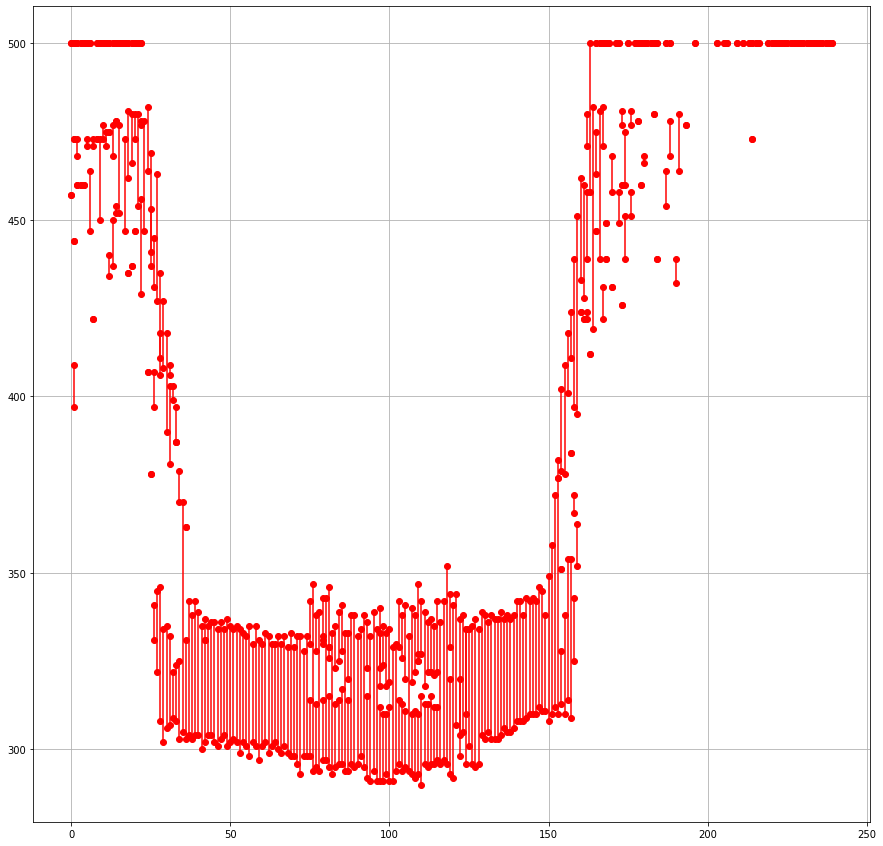

In [94]:
from scipy.ndimage import convolve
from math import *
from tabulate import tabulate
from IPython.display import HTML, display

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def fdistance(y):
    c = [1.49681642e-02, -1.87865657e-01,  1.77340481e+02]
    v = 0
    for k in c:
        v = v * y + k
    return v

def fy(d):
    c = [ 5.89494380e-06, -7.03269136e-03,  3.00940632e+00, -3.28471368e+02]
    v = 0
    for k in c:
        v = v * d + k
    return v

def fh(y,d):
    return (height - y - fy(d)) * (d / 250) 

def dscatter4(file):
    img = load_img(file)
    x0 = xc
    
    for x0 in range(width):
        objs = []
        thlast = None
        tylast = None
        tdlast = None
        state = "unknown"
        for y in range(height):
            d0 = img[x0,height - y - 1]
            h0 = fh(height - y - 1,d0)

            if thlast is None or abs(h0 - thlast) / (y - tylast) < 3:
                if state == "ground":
                    if h0 > 10:
                        state = "obj"
                        cfoh = h0
                        cfod = d0
                        cfof = d0
                        ccnt = 0
                else:
                    if state == "obj":
                        if h0 <= 10:
                            objs.append((cfod, cfoh, cfof - cfod,ccnt))
                            state = "ground"
                        else:
                            if abs(d0 - tdlast) >= 20:
                                objs.append((cfod,cfoh, cfof - cfod, ccnt))
                                state = "unknown"
                            else:
                                ccnt += 1
                                if h0 > cfoh:
                                    cfoh = h0
                                if d0 < cfod:
                                    cfod = d0
                                if d0 > cfof:
                                    cfof = d0
                    else:
                        if state == "unknown":
                            if h0 < 10:
                                state = "ground"
                            else:
                                if tdlast is None or abs(d0 - tdlast) < 20:
                                    state = "obj"
                                    cfoh = h0
                                    cfod = d0
                                    cfof = d0
                                    ccnt = 0
                thlast = h0
                tylast = y
                tdlast = d0

        if state == "obj":
            objs.append((cfod,cfoh, cfof - cfod, ccnt))

        #print(objs)

        #ax.scatter(xd, yd3, label=f"{file}:{x0}")
        for d,h,g,n in objs:
            ax.plot([x0,x0],[d,d+g], 'ro-')
    
    
    #display(HTML(tabulate(table,tablefmt='html',headers='firstrow')))
    



#dscatter4("depth_stay10")
#dscatter4("depth_side10")
#dscatter4("depth_lay1050")
#dscatter4("depth_stay20")
#dscatter4("depth_side20")
#dscatter4("depth_lay20")
#dscatter4("depth_stay30")
#dscatter4("depth_side30")
#dscatter4("depth_lay30")
#dscatter4("depth_bigbox50")
dscatter4("depth_bigbox30")



ax.grid(True)
#ax.legend()
#ax.set_ylim(-50,100)
#ax.set_xlim(110,150)
    
plt.show()